#### Introduction
In this notebook we will learn how to use scikit learn to build best 
linear regressor model. We used gapminder dataset which is related to 
population in different region and average life expectency. More about our 
dataset you will see below. We split our datasets into train and test set.
We build our model using scikit learn elasticnet linear model. We evaluate 
our model using test set. We used gridsearch cross validation to optimized our
model.

### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Reading the data in

In [2]:
data = pd.read_csv('data/gm_2008_region.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### Data Exploration

Before we build our model Let's have a descriptive exploration on our data. We will visualize how each feature is co-related to each other. Also we will visualize some features vs life of our dataset. Visualization will give us better understanding of our data and will help us to select appropriate feature to build our model.

In [3]:
# summerize our data
data.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [4]:
# Let's select some of the features to explore more
chosen_data = data[['population', 'fertility', 'HIV', 'CO2', 'GDP', 'child_mortality', 'life']]
chosen_data.head()

,population,fertility,HIV,CO2,GDP,child_mortality,life
0,34811059.0,2.73,0.1,3.328945,12314.0,29.5,75.3
1,19842251.0,6.43,2.0,1.474353,7103.0,192.0,58.3
2,40381860.0,2.24,0.5,4.785170,14646.0,15.4,75.5
3,2975029.0,1.40,0.1,1.804106,7383.0,20.0,72.5
4,21370348.0,1.96,0.1,18.016313,41312.0,5.2,81.5


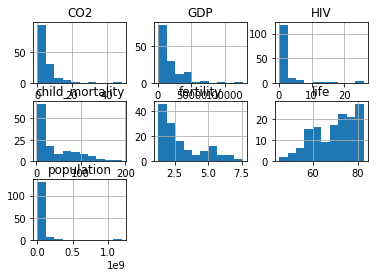

In [5]:
# We can plot each of these features 
chosen_data.hist()
plt.show()

Let's now plot each of these features vs life, to their relation

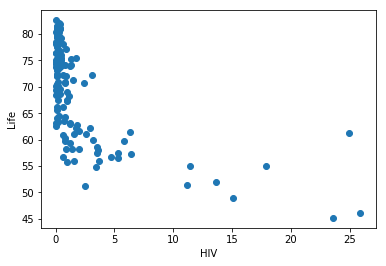

In [6]:
plt.scatter(chosen_data.HIV, chosen_data.life)
plt.xlabel('HIV')
plt.ylabel('Life')
plt.show()

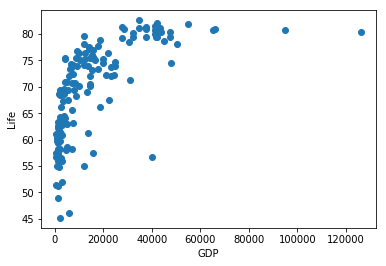

In [7]:
plt.scatter(chosen_data.GDP, chosen_data.life)
plt.xlabel('GDP')
plt.ylabel('Life')
plt.show()

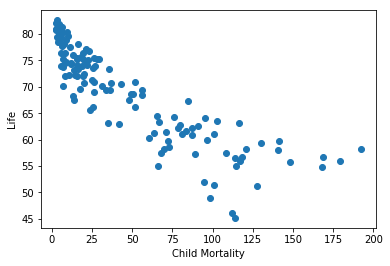

In [8]:
plt.scatter(chosen_data.child_mortality, chosen_data.life)
plt.xlabel('Child Mortality')
plt.ylabel('Life')
plt.show()

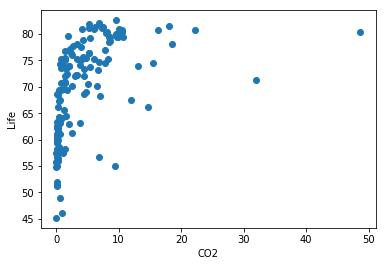

In [9]:
plt.scatter(chosen_data.CO2, chosen_data.life)
plt.xlabel('CO2')
plt.ylabel('Life')
plt.show()

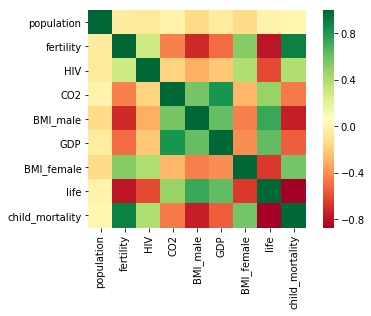

In [10]:
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

### Data preprocessing
We will be using scikit learn to build our model as I mentioned earlier. We have to make sure that there is/are no missing value exist in our dataset. Also we we have to make sure all of our features data are numerical. As categorical data will not be entertained by scikit learn model. In the following we address and fix such issues. 

In [11]:
# dertermining any missing value
data.count()

population         139
fertility          139
HIV                139
CO2                139
BMI_male           139
GDP                139
BMI_female         139
life               139
child_mortality    139
Region             139
dtype: int64

In [12]:
# determining andy null value
data.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [13]:
# determing categorical value
data.Region.head()

0    Middle East & North Africa
1            Sub-Saharan Africa
2                       America
3         Europe & Central Asia
4           East Asia & Pacific
Name: Region, dtype: object

In [14]:
# Converting categorical to numerical 
data = pd.get_dummies(data, drop_first=True)

In [15]:
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we will train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [16]:
# Choosing target feature
y = data[['life']]
print(y.head(3))

# Choosing input features
X = data.drop(data[['life']], axis=1)
print(X.head(3))

   life
0  75.3
1  58.3
2  75.5
   population  fertility  HIV       CO2  BMI_male      GDP  BMI_female  \
0  34811059.0       2.73  0.1  3.328945  24.59620  12314.0    129.9049   
1  19842251.0       6.43  2.0  1.474353  22.25083   7103.0    130.1247   
2  40381860.0       2.24  0.5  4.785170  27.50170  14646.0    118.8915   

   child_mortality  Region_East Asia & Pacific  Region_Europe & Central Asia  \
0             29.5                           0                             0   
1            192.0                           0                             0   
2             15.4                           0                             0   

   Region_Middle East & North Africa  Region_South Asia  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   

   Region_Sub-Saharan Africa  
0                          0  
1                          1  
2                   

In [17]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

### Building and Evaluating model
As mentioned at the beginning, we are using elasticnet and grid search Cross validation. You can find great explanation in scikit-learn documentation.

In [18]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8697529413665848
Tuned ElasticNet MSE: 9.837193188072188


C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
